**KNN**

According to this algorithm, which is used in classification, feature extraction during classification is used to look at the closeness of the new individual to be categorized to k of the previous individuals.
For example, you want to classify a new element for k = 3. in this case the nearest 3 of the old classified elements are taken. If these elements are included in the class, the new element is also included in that class. The euclide distance can be used in the distance calculation.

# Project - Classify Type of Patient from the biomechanical features of orthopedic patients.

# Install the necessary libraries


In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# import data 2C_weka.csv for 2 Class Classifcation.


In [2]:
# Load Dataset
class_2_data = pd.read_csv("2Classdata.csv")

# Explore the data set.Get necessary information about the data.

Look at the head and tail of dataset.
Find the missing value.
Look at the unique values of class values.
Look at the distribution of class values and other attributes.
Get the datatype information about the dataset
Plot the distribution of different classes for pelvic_radius and sacral_slope for visualization.

In [3]:
# Get head of dataset
class_2_data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [4]:
# Get tail of dataset
class_2_data.tail()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal
309,33.841641,5.073991,36.641233,28.767649,123.945244,-0.199249,Normal


In [5]:
# Check datatypes and null values
class_2_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
pelvic_incidence            310 non-null float64
pelvic_tilt numeric         310 non-null float64
lumbar_lordosis_angle       310 non-null float64
sacral_slope                310 non-null float64
pelvic_radius               310 non-null float64
degree_spondylolisthesis    310 non-null float64
class                       310 non-null object
dtypes: float64(6), object(1)
memory usage: 17.0+ KB


In [6]:
# According to above result, no null values are present in dataset

# Another way to check null values 

class_2_data[class_2_data.isnull().any(axis=1)]


,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class


In [7]:
# Get unique values of the column - class
class_2_data["class"].unique()

array(['Abnormal', 'Normal'], dtype=object)

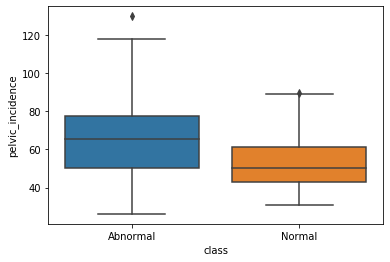

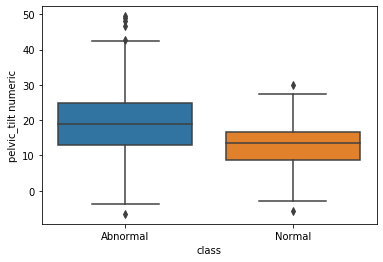

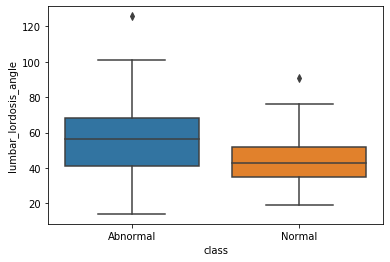

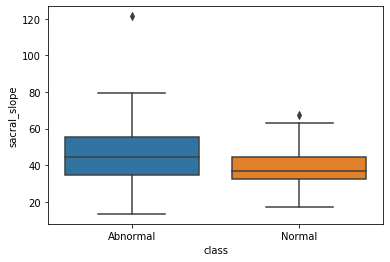

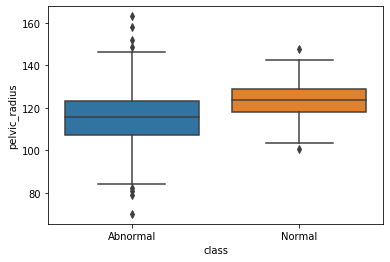

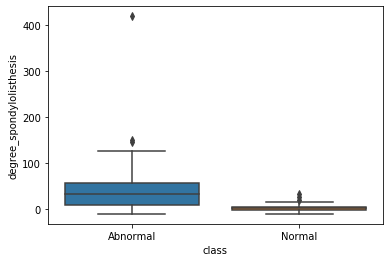

In [8]:
# Plot distribution of different attributes and class attributes
sns.boxplot( x='class', y='pelvic_incidence', data=class_2_data)
plt.show()

sns.boxplot( x='class', y='pelvic_tilt numeric', data=class_2_data)
plt.show()

sns.boxplot( x='class', y='lumbar_lordosis_angle', data=class_2_data)
plt.show()

sns.boxplot( x='class', y='sacral_slope', data=class_2_data)
plt.show()

sns.boxplot( x='class', y='pelvic_radius', data=class_2_data)
plt.show()

sns.boxplot( x='class', y='degree_spondylolisthesis', data=class_2_data)
plt.show()

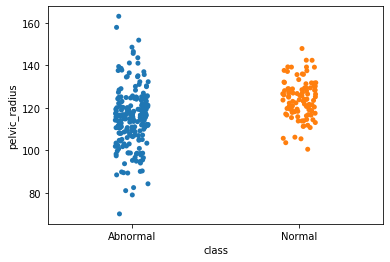

In [9]:
# Plot pelvic_radius distribution wrt class 
sns.stripplot(x="class", y = "pelvic_radius", data=class_2_data)
plt.show()

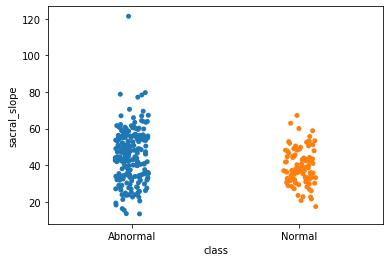

In [10]:
# Plot sacral_slope distribution wrt class 
sns.stripplot(x="class", y = "sacral_slope", data=class_2_data)
plt.show()

# Encode the Class variable to integer.

In [14]:
# Replace class string values with numerical values
class_2_data.replace({'class': {"Normal": 0, "Abnormal": 1}}, inplace=True)

In [15]:
class_2_data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,1
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,1
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,1
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,1
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,1


In [16]:
class_2_data.tail()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,0
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,0
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,0
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,0
309,33.841641,5.073991,36.641233,28.767649,123.945244,-0.199249,0


# Create the X(Feature-set) and Y(Target-set) sets for your Data.

In [17]:
X = class_2_data.drop('class', axis=1)
Y = class_2_data['class']

# Normalize your Data (X) to get values between 0 to 1.

In [18]:
sc = StandardScaler()

# Split the dat as train and test with a ratio of 70:30.

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30)

In [20]:
# Normalizing data here as it's not possible to normalize data before splitting
sc.fit(X_train)


StandardScaler(copy=True, with_mean=True, with_std=True)

# Build the KNN model using Train Dataset and predict the class on test dataset.

In [21]:
scaledX_train = sc.transform(X_train)
scaledX_test  = sc.transform(X_test)

In [22]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(scaledX_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [23]:
Y_predict = knn.predict(scaledX_test)

In [24]:
Y_predict

array([0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1], dtype=int64)

# Calculate the performance score of of your classification on test dataset.
Hint- You can use knn.score( ) function.

In [25]:
print("Testing Accuracy")
print(knn.score(scaledX_test, Y_test))

print("Training Accuracy")
print(knn.score(scaledX_train, Y_train))

Testing Accuracy
0.8494623655913979
Training Accuracy
0.8571428571428571


# What is the best K value for your classifcation?
#Find at which k value you get the best score.

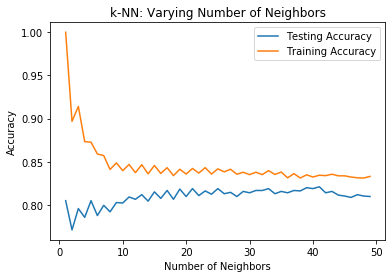

In [26]:

neighbors = np.arange(1, 50)
train_accuracy_plot = np.empty(len(neighbors))
test_accuracy_plot = np.empty(len(neighbors))
sc = StandardScaler()
# Loop over different values of k
for i, k in enumerate(neighbors):
    train = []
    test = []
    for j in range(20):
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30,random_state=j)        
        scaledX_train = sc.fit_transform(X_train)
        scaledX_test = sc.transform(X_test)
        
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(scaledX_train, Y_train)
        
        train.append(knn.score(scaledX_train, Y_train))
        test.append(knn.score(scaledX_test, Y_test))
    #Compute accuracy on the training set
    train_accuracy_plot[i] = np.mean(train)
    #Compute accuracy on the testing set
    test_accuracy_plot[i] = np.mean(test)
# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy_plot, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy_plot, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [27]:
# Hence, aproximately K = 40

# import data 3C_weka.csv for 3 Class Classifcation and repeat all the steps which are given above.

In [28]:
# Load Dataset
class_3_data = pd.read_csv("3Classdata.csv")

In [29]:
# Get head of dataset
class_3_data.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Hernia
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Hernia
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Hernia
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Hernia
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Hernia


In [30]:
# Get tail of dataset
class_3_data.tail()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal
309,33.841641,5.073991,36.641233,28.767649,123.945244,-0.199249,Normal


In [31]:
# Check datatypes and null values
class_3_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
pelvic_incidence            310 non-null float64
pelvic_tilt                 310 non-null float64
lumbar_lordosis_angle       310 non-null float64
sacral_slope                310 non-null float64
pelvic_radius               310 non-null float64
degree_spondylolisthesis    310 non-null float64
class                       310 non-null object
dtypes: float64(6), object(1)
memory usage: 17.0+ KB


In [32]:
# According to above result, no null values are present in dataset

# Another way to check null values 

class_3_data[class_3_data.isnull().any(axis=1)]

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class


In [33]:
# Get unique values of the column - class
class_3_data["class"].unique()

array(['Hernia', 'Spondylolisthesis', 'Normal'], dtype=object)

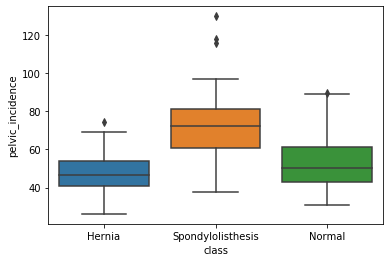

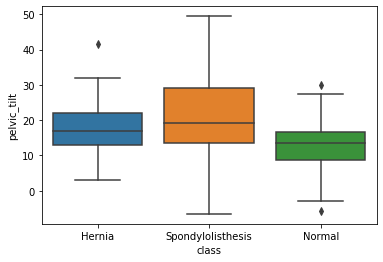

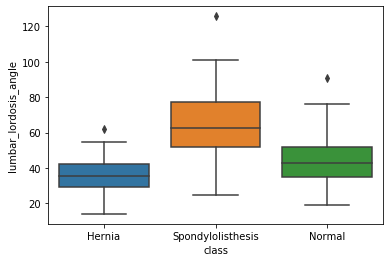

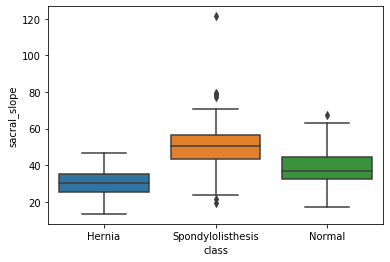

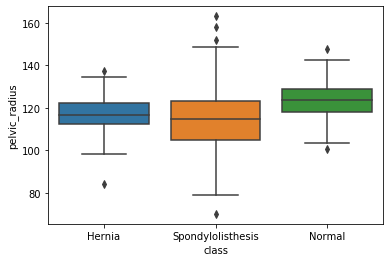

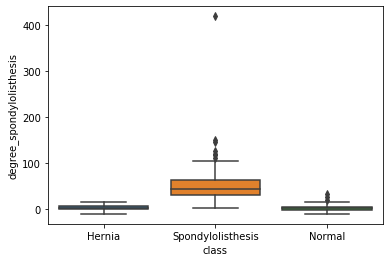

In [34]:
# Plot distribution of different attributes and class attributes
sns.boxplot( x='class', y='pelvic_incidence', data=class_3_data)
plt.show()

sns.boxplot( x='class', y='pelvic_tilt', data=class_3_data)
plt.show()

sns.boxplot( x='class', y='lumbar_lordosis_angle', data=class_3_data)
plt.show()

sns.boxplot( x='class', y='sacral_slope', data=class_3_data)
plt.show()

sns.boxplot( x='class', y='pelvic_radius', data=class_3_data)
plt.show()

sns.boxplot( x='class', y='degree_spondylolisthesis', data=class_3_data)
plt.show()

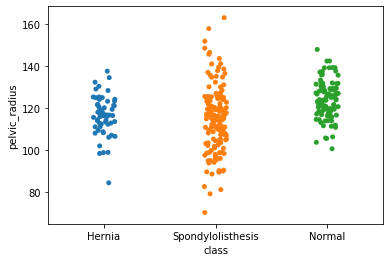

In [35]:
# Plot pelvic_radius distribution wrt class 
sns.stripplot(x="class", y = "pelvic_radius", data=class_3_data)
plt.show()

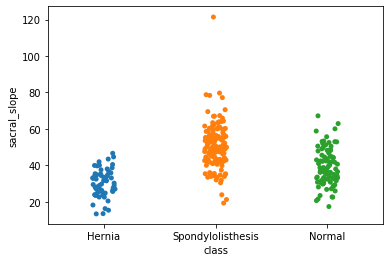

In [36]:
# Plot sacral_slope distribution wrt class 
sns.stripplot(x="class", y = "sacral_slope", data=class_3_data)
plt.show()

In [37]:
# Replace class string values with numerical values
class_3_data.replace({'class': {"Normal": 0, "Hernia": 1, "Spondylolisthesis" : 2}}, inplace=True)

In [38]:
class_3_data.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,1
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,1
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,1
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,1
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,1


In [39]:
class_3_data.tail()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,0
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,0
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,0
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,0
309,33.841641,5.073991,36.641233,28.767649,123.945244,-0.199249,0


In [40]:
# Create the X(Feature-set) and Y(Target-set) sets for your Data.

In [41]:
X = class_3_data.drop('class',axis=1)
Y = class_3_data['class']

In [42]:
# Split the data as train and test with a ratio of 70:30.

In [43]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30)

In [44]:
# Normalize your Data (X) to get values between 0 to 1.

In [45]:
sc = StandardScaler()
sc.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [46]:
# Build the KNN model using Train Dataset and predict the class on test dataset.

In [47]:
scaledX_train = sc.transform(X_train)
scaledX_test  = sc.transform(X_test)

In [48]:
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(scaledX_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                     weights='uniform')

In [49]:
Y_predict = knn.predict(scaledX_test)

In [50]:
Y_predict

array([2, 2, 0, 0, 0, 2, 2, 0, 2, 2, 2, 2, 0, 0, 2, 0, 0, 0, 0, 2, 2, 1,
       0, 2, 2, 0, 0, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 2, 0, 1, 2, 1, 2,
       0, 1, 1, 2, 1, 2, 0, 2, 2, 1, 2, 0, 2, 0, 0, 2, 2, 0, 1, 1, 0, 0,
       0, 2, 1, 2, 2, 2, 0, 0, 2, 0, 0, 1, 0, 2, 0, 0, 1, 0, 1, 2, 0, 2,
       2, 2, 0, 0, 2], dtype=int64)

In [51]:
# Calculate the performance score of of your classification on test dataset.

In [52]:
print("Testing Accuracy")
print(knn.score(scaledX_test, Y_test))

print("Training Accuracy")
print(knn.score(scaledX_train, Y_train))

Testing Accuracy
0.7311827956989247
Training Accuracy
0.8110599078341014


In [53]:
# What is the best K value for your classifcation?
# Find at which k value you get the best score.

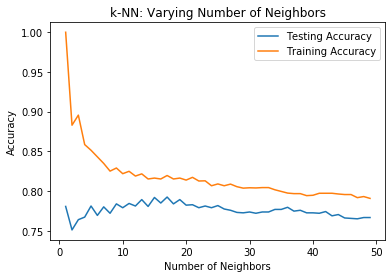

In [54]:

neighbors = np.arange(1, 50)
train_accuracy_plot = np.empty(len(neighbors))
test_accuracy_plot = np.empty(len(neighbors))
sc = StandardScaler()
# Loop over different values of k
for i, k in enumerate(neighbors):
    train = []
    test = []
    for j in range(20):
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30,random_state=j)        
        scaledX_train = sc.fit_transform(X_train)
        scaledX_test = sc.transform(X_test)
        
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(scaledX_train, Y_train)
        
        train.append(knn.score(scaledX_train, Y_train))
        test.append(knn.score(scaledX_test, Y_test))
    #Compute accuracy on the training set
    train_accuracy_plot[i] = np.mean(train)
    #Compute accuracy on the testing set
    test_accuracy_plot[i] = np.mean(test)
# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy_plot, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy_plot, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [55]:
# According to graph above, Aproximately K = 15